# **IMPORTING NECESSARY LIBRARIES**

In [1]:
import datetime
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# **GETTING DATA**

In [4]:
ticker = input('Enter Ticker Symbol --> ')
start_time = '2015-01-01'
end_time = datetime.datetime.now()
end_time = end_time.strftime('%Y-%m-%d')

Enter Ticker Symbol --> INFY


In [5]:
df = pd.DataFrame()
df = yf.download(ticker, start=start_time, end=end_time)
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,8.057500,8.0600,7.915000,7.975000,6.689279,13401600
2015-01-05,7.917500,7.9350,7.835000,7.875000,6.605400,10076400
2015-01-06,7.847500,7.9250,7.695000,7.820000,6.559267,13290800
2015-01-07,7.850000,8.0475,7.845000,7.985000,6.697666,23202800
2015-01-08,8.012500,8.0800,8.002500,8.027500,6.733314,14087200
...,...,...,...,...,...,...
2021-06-28,21.370001,21.5000,21.200001,21.290001,21.290001,4669000
2021-06-29,21.309999,21.5000,21.219999,21.450001,21.450001,4748600
2021-06-30,21.410000,21.4300,21.170000,21.190001,21.190001,6493500


In [6]:
new_df = df['Adj Close']
new_df

Date
2015-01-02     6.689279
2015-01-05     6.605400
2015-01-06     6.559267
2015-01-07     6.697666
2015-01-08     6.733314
                ...    
2021-06-28    21.290001
2021-06-29    21.450001
2021-06-30    21.190001
2021-07-01    20.959999
2021-07-02    21.070000
Name: Adj Close, Length: 1637, dtype: float64

# **TRAIN/TEST SPLIT**

In [7]:
def train_test_split(lookback):
  train = new_df.iloc[:1437]
  test = new_df.iloc[1437:]

  train = train.values.reshape(-1, 1)
  test = test.values.reshape(-1, 1)

  #########################

  scaler_train = MinMaxScaler()
  train = scaler_train.fit_transform(train)

  X_train = [] 
  Y_train = []
  
  for i in range(lookback, len(train)):
    X_train.append(train[i - lookback:i, 0])
    Y_train.append(train[i, 0])

  X_train = np.array(X_train)
  Y_train = np.array(Y_train)

  #########################

  scaler_test = MinMaxScaler()
  test = scaler_test.fit_transform(test)
  
  X_test = []
  Y_test = []

  for i in range(lookback, len(test)):
    X_test.append(test[i - lookback:i, 0])
    Y_test.append(test[i, 0])

  X_test = np.array(X_test)
  Y_test = np.array(Y_test)

  X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
  X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
  
  return X_train, Y_train, X_test, Y_test, scaler_test.scale_[0]

# **LSTM MODEL**

In [8]:
def LSTM_model(lookback):
  model = Sequential()

  model.add(LSTM(units=60, activation= 'tanh', return_sequences=True, input_shape=(lookback,1)))
  model.add(Dropout(0.2))

  model.add(LSTM(units=60, activation= 'tanh', return_sequences=True))
  model.add(Dropout(0.2))

  model.add(LSTM(units=60, activation= 'tanh', return_sequences=True))
  model.add(Dropout(0.2))

  model.add(LSTM(units=120, activation= 'tanh'))
  model.add(Dropout(0.2))

  model.add(Dense(units=1))

  return model

# **LOSS PLOT**

In [9]:
def loss_plot(history):
  plt.plot(history.history['loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Mean Squared Error')
  plt.title('Epochs vs Mean Squared Error')
  plt.show()

# **EVALUATION ON TEST DATA-SET**

In [10]:
def evaluation_test(model, X_test, Y_test):
  evalu = model.evaluate(X_test, Y_test, verbose=0)
  return evalu

# **REAL VS PREDICTION PLOT**

In [11]:
def prediction_real(Y_test, Y_pred):
  plt.figure(figsize=(14,5))
  plt.plot(Y_test, label='Real Stock Price')
  plt.plot(Y_pred, label='Predicted Stock Price')
  plt.title('Infosys Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('Price')
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.show()

# **MODELS**

### **LOOKBACK = 20**

In [20]:
X_train_1, Y_train_1, X_test_1, Y_test_1, scale_1 = train_test_split(20)

In [ ]:
model_1 = LSTM_model(20)
model_1.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_1 = model_1.fit(X_train_1, Y_train_1, verbose=2, epochs=90)

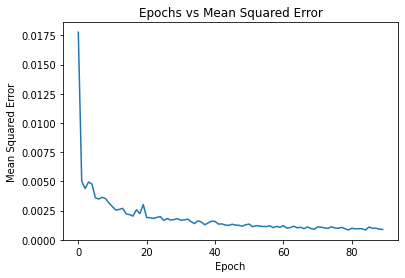

In [22]:
loss_plot(history_1)

In [23]:
print('Mean Squared Error of model on Test Data-Set =', evaluation_test(model_1, X_test_1, Y_test_1))

Mean Squared Error of model on Test Data-Set = 0.001350683975033462


In [24]:
Y_pred_1 = model_1.predict(X_test_1)

Y_test_1 = Y_test_1/scale_1
Y_pred_1 = Y_pred_1/scale_1

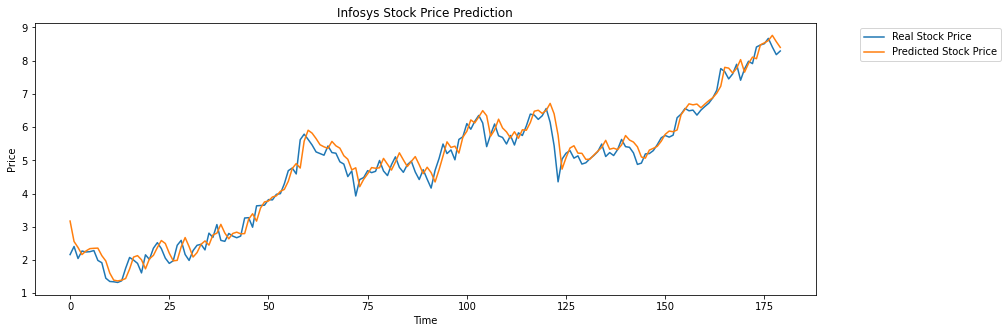

In [25]:
prediction_real(Y_test_1, Y_pred_1)

### **LOOKBACK = 40**

In [26]:
X_train_2, Y_train_2, X_test_2, Y_test_2, scale_2 = train_test_split(40)

In [ ]:
model_2 = LSTM_model(40)
model_2.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_2 = model_2.fit(X_train_2, Y_train_2, verbose=2, epochs=90)

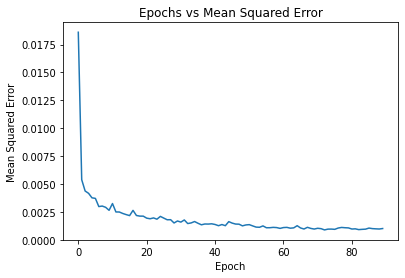

In [28]:
loss_plot(history_2)

In [29]:
print('Mean Squared Error of model on Test Data-Set =', evaluation_test(model_2, X_test_2, Y_test_2))

Mean Squared Error of model on Test Data-Set = 0.003780486760661006


In [30]:
Y_pred_2 = model_2.predict(X_test_2)

Y_test_2 = Y_test_2/scale_2
Y_pred_2 = Y_pred_2/scale_2

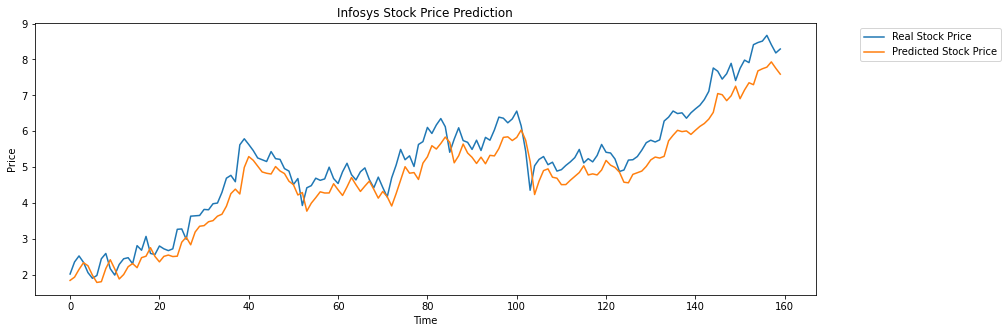

In [31]:
prediction_real(Y_test_2, Y_pred_2)

### **LOOKBACK = 60**

In [32]:
X_train_3, Y_train_3, X_test_3, Y_test_3, scale_3 = train_test_split(60)

In [ ]:
model_3 = LSTM_model(60)
model_3.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_3 = model_3.fit(X_train_3, Y_train_3, verbose=2, epochs=90)

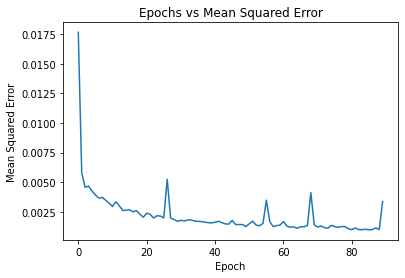

In [34]:
loss_plot(history_3)

In [35]:
print('Mean Squared Error of model on Test Data-Set =', evaluation_test(model_3, X_test_3, Y_test_3))

Mean Squared Error of model on Test Data-Set = 0.0025722202844917774


In [36]:
Y_pred_3 = model_3.predict(X_test_3)

Y_test_3 = Y_test_3/scale_3
Y_pred_3 = Y_pred_3/scale_3

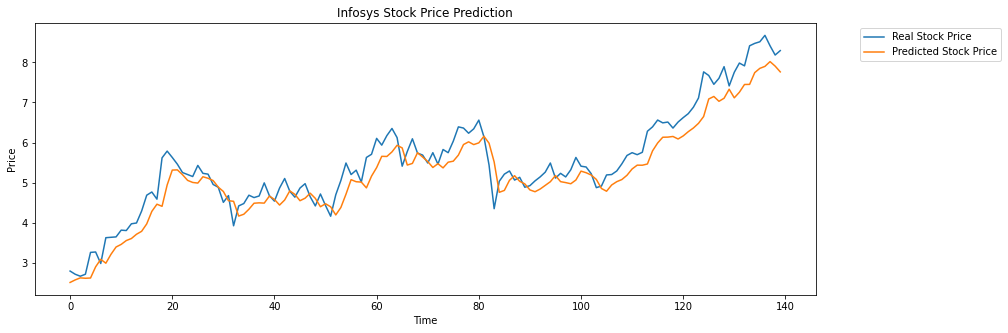

In [37]:
prediction_real(Y_test_3, Y_pred_3)

### **LOOKBACK = 80**

In [38]:
X_train_4, Y_train_4, X_test_4, Y_test_4, scale_4 = train_test_split(80)

In [ ]:
model_4 = LSTM_model(80)
model_4.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_4 = model_4.fit(X_train_4, Y_train_4, verbose=2, epochs=90)

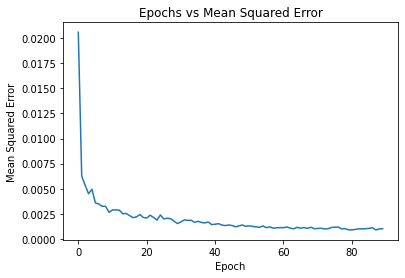

In [40]:
loss_plot(history_4)

In [41]:
print('Mean Squared Error of model on Test Data-Set =', evaluation_test(model_4, X_test_4, Y_test_4))

Mean Squared Error of model on Test Data-Set = 0.0023749086540192366


In [42]:
Y_pred_4 = model_4.predict(X_test_4)

Y_test_4 = Y_test_4/scale_4
Y_pred_4 = Y_pred_4/scale_4

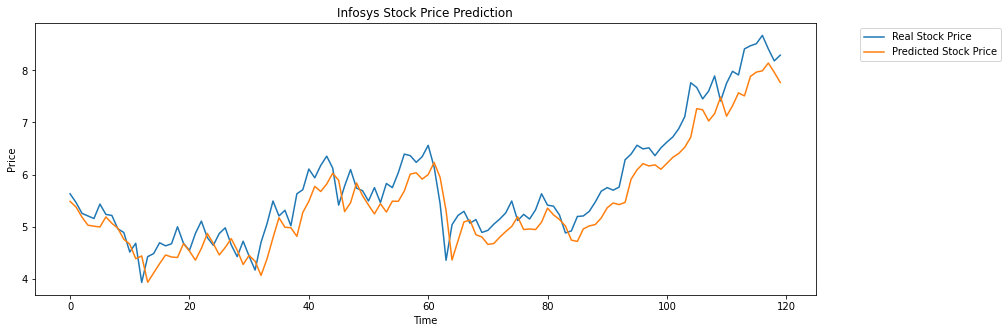

In [43]:
prediction_real(Y_test_4, Y_pred_4)

### **LOOKBACK = 100** 

In [44]:
X_train_5, Y_train_5, X_test_5, Y_test_5, scale_5 = train_test_split(100)

In [ ]:
model_5 = LSTM_model(100)
model_5.compile(optimizer = 'adam', loss = 'mean_squared_error')
history_5 = model_5.fit(X_train_5, Y_train_5, verbose=2, epochs=90)

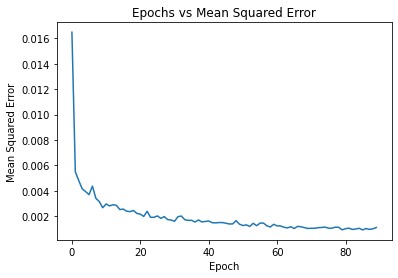

In [46]:
loss_plot(history_5)

In [47]:
print('Mean Squared Error of model on Test Data-Set =', evaluation_test(model_5, X_test_5, Y_test_5))

Mean Squared Error of model on Test Data-Set = 0.0013440190814435482


In [48]:
Y_pred_5 = model_5.predict(X_test_5)

Y_test_5 = Y_test_5/scale_5
Y_pred_5 = Y_pred_5/scale_5

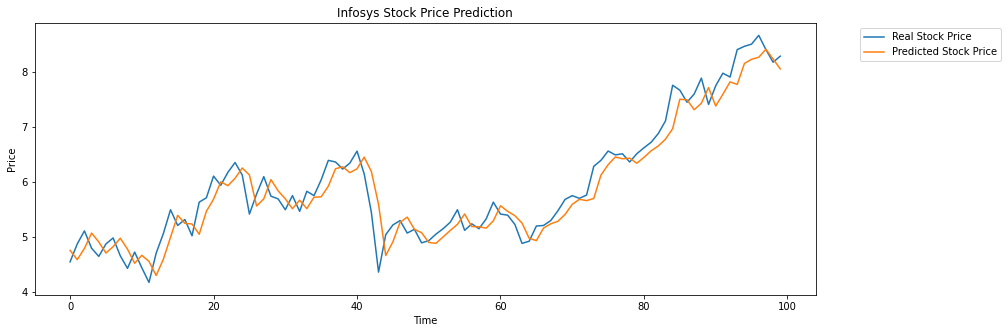

In [49]:
prediction_real(Y_test_5, Y_pred_5)